In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format='retina'

# Load data

This data has been webscraped or downloaded via API from goodreads.com. 

In [2]:
reviews_df = pd.read_csv('../data/preprocessed/reviews.csv')
books_df = pd.read_csv('../data/preprocessed/books.csv')

In [3]:
reviews_df.head()

,book_id,user_id,user_rating,user_review
0,2612,1,4,Really good book. It read like a bestseller (q...
1,368593,1,5,I found this book on a recommendation from a g...
2,211099,1,5,I learned two major things from this book: the...
3,18176747,1,5,I haven’t read many (any?) books that are writ...
4,350,1,5,I really enjoyed this book. The concept of a m...


In [4]:
books_df.head()

,id,best_id,title,author,description,year,num_pages,format,media_type,language,image_url,average_rating,rating_dist,ratings_count,text_reviews_count,shelves
0,1,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,The war against Voldemort is not going well; e...,2005.0,652.0,Paperback,book,eng,https://i.gr-assets.com/images/S/compressed.ph...,4.57,5:1598220|4:570051|3:163397|2:25942|1:10453|to...,2368063,38135,"{""fantasy"": 46663, ""favorites"": 39215, ""young-..."
1,10,10,"Harry Potter Collection (Harry Potter, #1-6)",J.K. Rowling,"Six years of magic, adventure, and mystery mak...",2005.0,3342.0,Hardcover,book,eng,https://i.gr-assets.com/images/S/compressed.ph...,4.73,5:24710|4:4399|3:1086|2:217|1:267|total:30679,30679,939,"{""favorites"": 373, ""fantasy"": 283, ""fiction"": ..."
2,1000,1000,Millionaire Women Next Door: The Many Journeys...,Thomas J. Stanley,"""Most Americans are not free. They are chained...",2004.0,320.0,Hardcover,book,NaN,https://s.gr-assets.com/assets/nophoto/book/11...,3.88,5:233|4:178|3:169|2:51|1:12|total:643,643,70,"{""finance"": 24, ""non-fiction"": 18, ""nonfiction..."
3,10000,10000,The Face of Another,Kōbō Abe,Like an elegantly chilling postscript to The M...,1964.0,238.0,Paperback,book,eng,https://i.gr-assets.com/images/S/compressed.ph...,3.77,5:894|4:1136|3:857|2:288|1:72|total:3247,3247,232,"{""fiction"": 159, ""japan"": 119, ""japanese"": 111..."
4,10000009,10000009,How to Teach a Slug to Read,Susan Pearson,A little boy explains to Mama Slug how to teac...,2011.0,32.0,Hardcover,book,en-US,https://i.gr-assets.com/images/S/compressed.ph...,3.97,5:228|4:291|3:143|2:37|1:11|total:710,710,133,"{""picture-books"": 107, ""picture-book"": 40, ""ch..."


# Books analysis

In [5]:
books_df.drop(['id', 'best_id'], axis=1).describe()

,year,num_pages,average_rating,ratings_count,text_reviews_count
count,56535.000000,51966.000000,56922.000000,5.692200e+04,56922.000000
mean,1990.046644,329.567409,3.948151,6.640995e+04,2841.049928
std,121.468226,191.003768,0.283172,2.979877e+05,8823.262843
min,-2270.000000,0.000000,2.270000,3.000000e+00,0.000000
25%,1995.000000,229.000000,3.780000,2.799000e+03,191.000000
50%,2007.000000,320.000000,3.970000,7.268000e+03,514.000000
75%,2012.000000,396.000000,4.140000,2.256100e+04,1619.000000
max,2020.000000,7852.000000,4.820000,6.827666e+06,170141.000000


In [6]:
num_of_books = books_df.loc[books_df.media_type == 'book'].count().id
print(f'There are {num_of_books} books in the dataframe after filtering out no book media.')

There are 56030 books in the dataframe after filtering out no book media.


In [11]:
not_best_edition_books = books_df.loc[books_df.id != books_df.best_id]
print(f'There are {not_best_edition_books.count().id} books which are not represented by its best editions.')

# test = not_best_edition_books.loc[~not_best_edition_books.best_id.isin(books_df.id)]
# reviews_df.groupby('book_id').count().user_id[test.id.values].sort_values()

There are 11031 books which are not represented by its best editions.


,id,best_id,title,author,description,year,num_pages,format,media_type,language,image_url,average_rating,rating_dist,ratings_count,text_reviews_count,shelves


In [8]:
books_df.language.unique()

array(['eng', nan, 'en-US', 'en-GB', 'nl', 'ara', 'spa', 'fre', 'ind',
       'scr', 'ger', 'swe', 'per', 'ita', 'hun', 'por', 'rus', 'vie',
       'en-CA', 'mul', 'pes', 'tam', 'msa', 'jpn', 'pol', 'slo', 'nor',
       'gre', 'kor', 'tur', 'en', 'fil', 'rum', 'urd', 'enm', 'dan', '--',
       'bul', 'isl', 'fin', 'ira', 'mal', 'grc', 'zho', 'heb', 'tgl'],
      dtype=object)

language
eng    44758
per      754
ara      324
spa      258
ind      214
fre      206
ger       99
por       63
nl        37
rus       36
jpn       31
tur       27
ita       23
mul       10
pol       10
msa       10
fil        8
swe        8
pes        6
rum        5
tam        4
nor        4
bul        4
dan        3
vie        2
scr        2
enm        2
urd        2
hun        2
fin        1
zho        1
mal        1
grc        1
gre        1
heb        1
ira        1
isl        1
kor        1
slo        1
tgl        1
--         1
Name: id, dtype: int64
There are 44758 books which have been written in english and 12164 in other language.


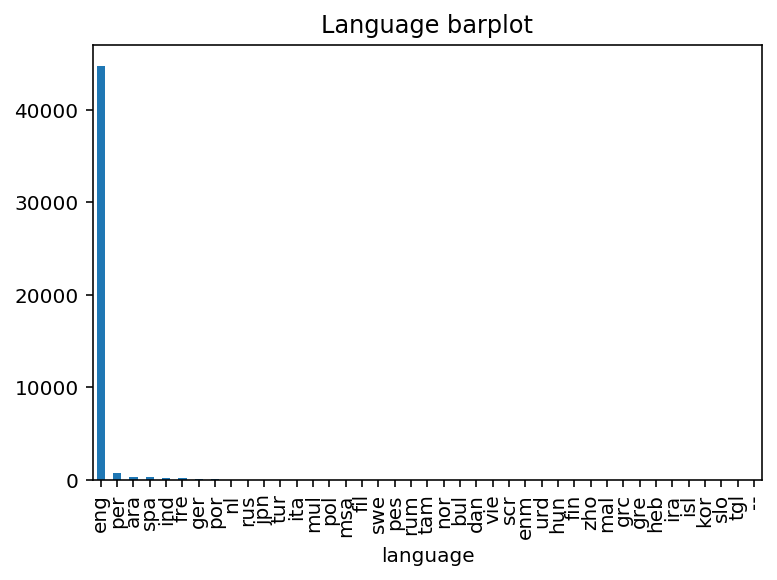

In [9]:
books_df.loc[books_df.language.isin([ 'eng', 'en-US', 'en-GB',  'en-CA', 'en' ]), 'language'] = 'eng'
languages = books_df.groupby(['language']).count().id.sort_values(ascending=False)
print(languages)
languages.plot.bar()
plt.title("Language barplot")
english_lang = books_df.loc[books_df.language == 'eng'].count().id
not_english_lang = books_df.loc[books_df.language != 'eng'].count().id
print(f'There are {english_lang} books which have been written in english and {not_english_lang} in other language.')

In [10]:
books_df.media_type.unique()

array(['book', 'not a book', nan, 'periodical', 'article'], dtype=object)

media_type
book          22368
periodical       32
not a book       25
article          10
Name: id, dtype: int64
There are 22368 books and 130 other media types.


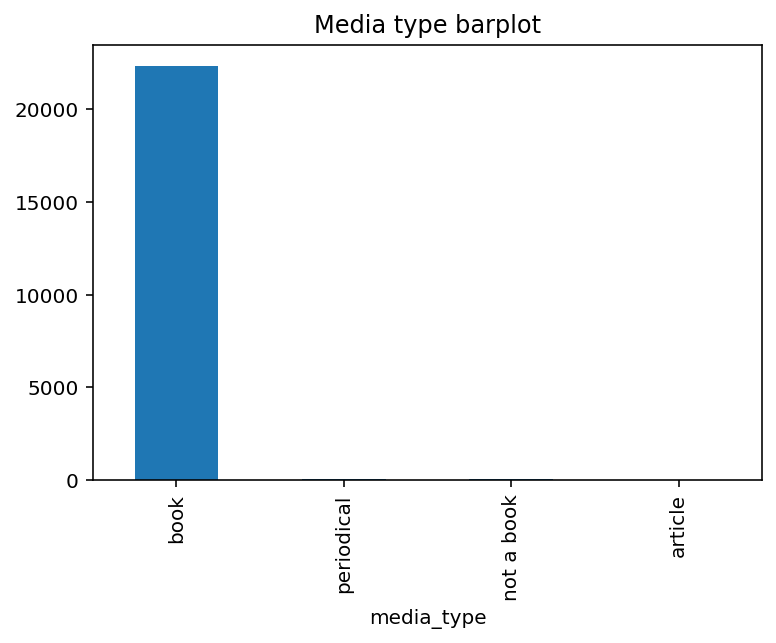

In [11]:
media_types = books_df.groupby(['media_type']).count().id.sort_values(ascending=False)
print(media_types)
media_types.plot.bar()
plt.title("Media type barplot")
book_type = books_df.loc[books_df.media_type == 'book'].count().id
not_book_type = books_df.loc[books_df.media_type != 'book'].count().id
print(f'There are {book_type} books and {not_book_type} other media types.')

In [12]:
books_df.format.unique()

array(['Paperback', 'Hardcover', nan, 'Kindle Edition', 'ebook',
       'Mass Market Paperback', 'Audio CD', 'Slipcased Hardcover',
       'Audio Cassette', 'Comics', 'Board Book', 'paperback',
       'Trade Paperback', 'Box Set', 'Paper back', 'Leather Bound',
       'Library Binding', 'Audible Audio', 'Nook', 'MP3 CD', 'Audiobook',
       'Comic Book', 'Broschiert', 'Science Fiction Book Club Omnibus',
       'Audio', 'Unknown Binding', 'رقعی', 'Paperback ', 'paper',
       'Slipcase Hardcover', 'Novelty Book', 'Softcover',
       'Paperback and online', 'Board book', 'Mass Market Paperback ',
       'Spiral-bound', 'Boxed Set', 'Loose-Leaf', 'コミック', 'Trade Paper',
       'pocket', 'Graphic Novel', 'Hardcover / گالینگور - وزیری'],
      dtype=object)

In [13]:
formats = books_df.groupby(['format']).count().id.sort_values(ascending=False)
print(formats)


format
Paperback                            10322
Hardcover                             6753
Mass Market Paperback                 1695
Kindle Edition                         823
ebook                                  432
Audio CD                                79
Audiobook                               34
Trade Paperback                         30
Comics                                  30
Board Book                              29
Audio Cassette                          18
Unknown Binding                         17
Library Binding                         11
Audible Audio                            9
paperback                                8
Leather Bound                            7
Paper back                               6
MP3 CD                                   5
Board book                               5
Slipcased Hardcover                      4
Nook                                     4
Spiral-bound                             3
paper                                    2
رقعی

Text(0.5, 1.0, 'Format barplot')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12467 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12511 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12483 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12463 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 12467 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 12511 missing from cur

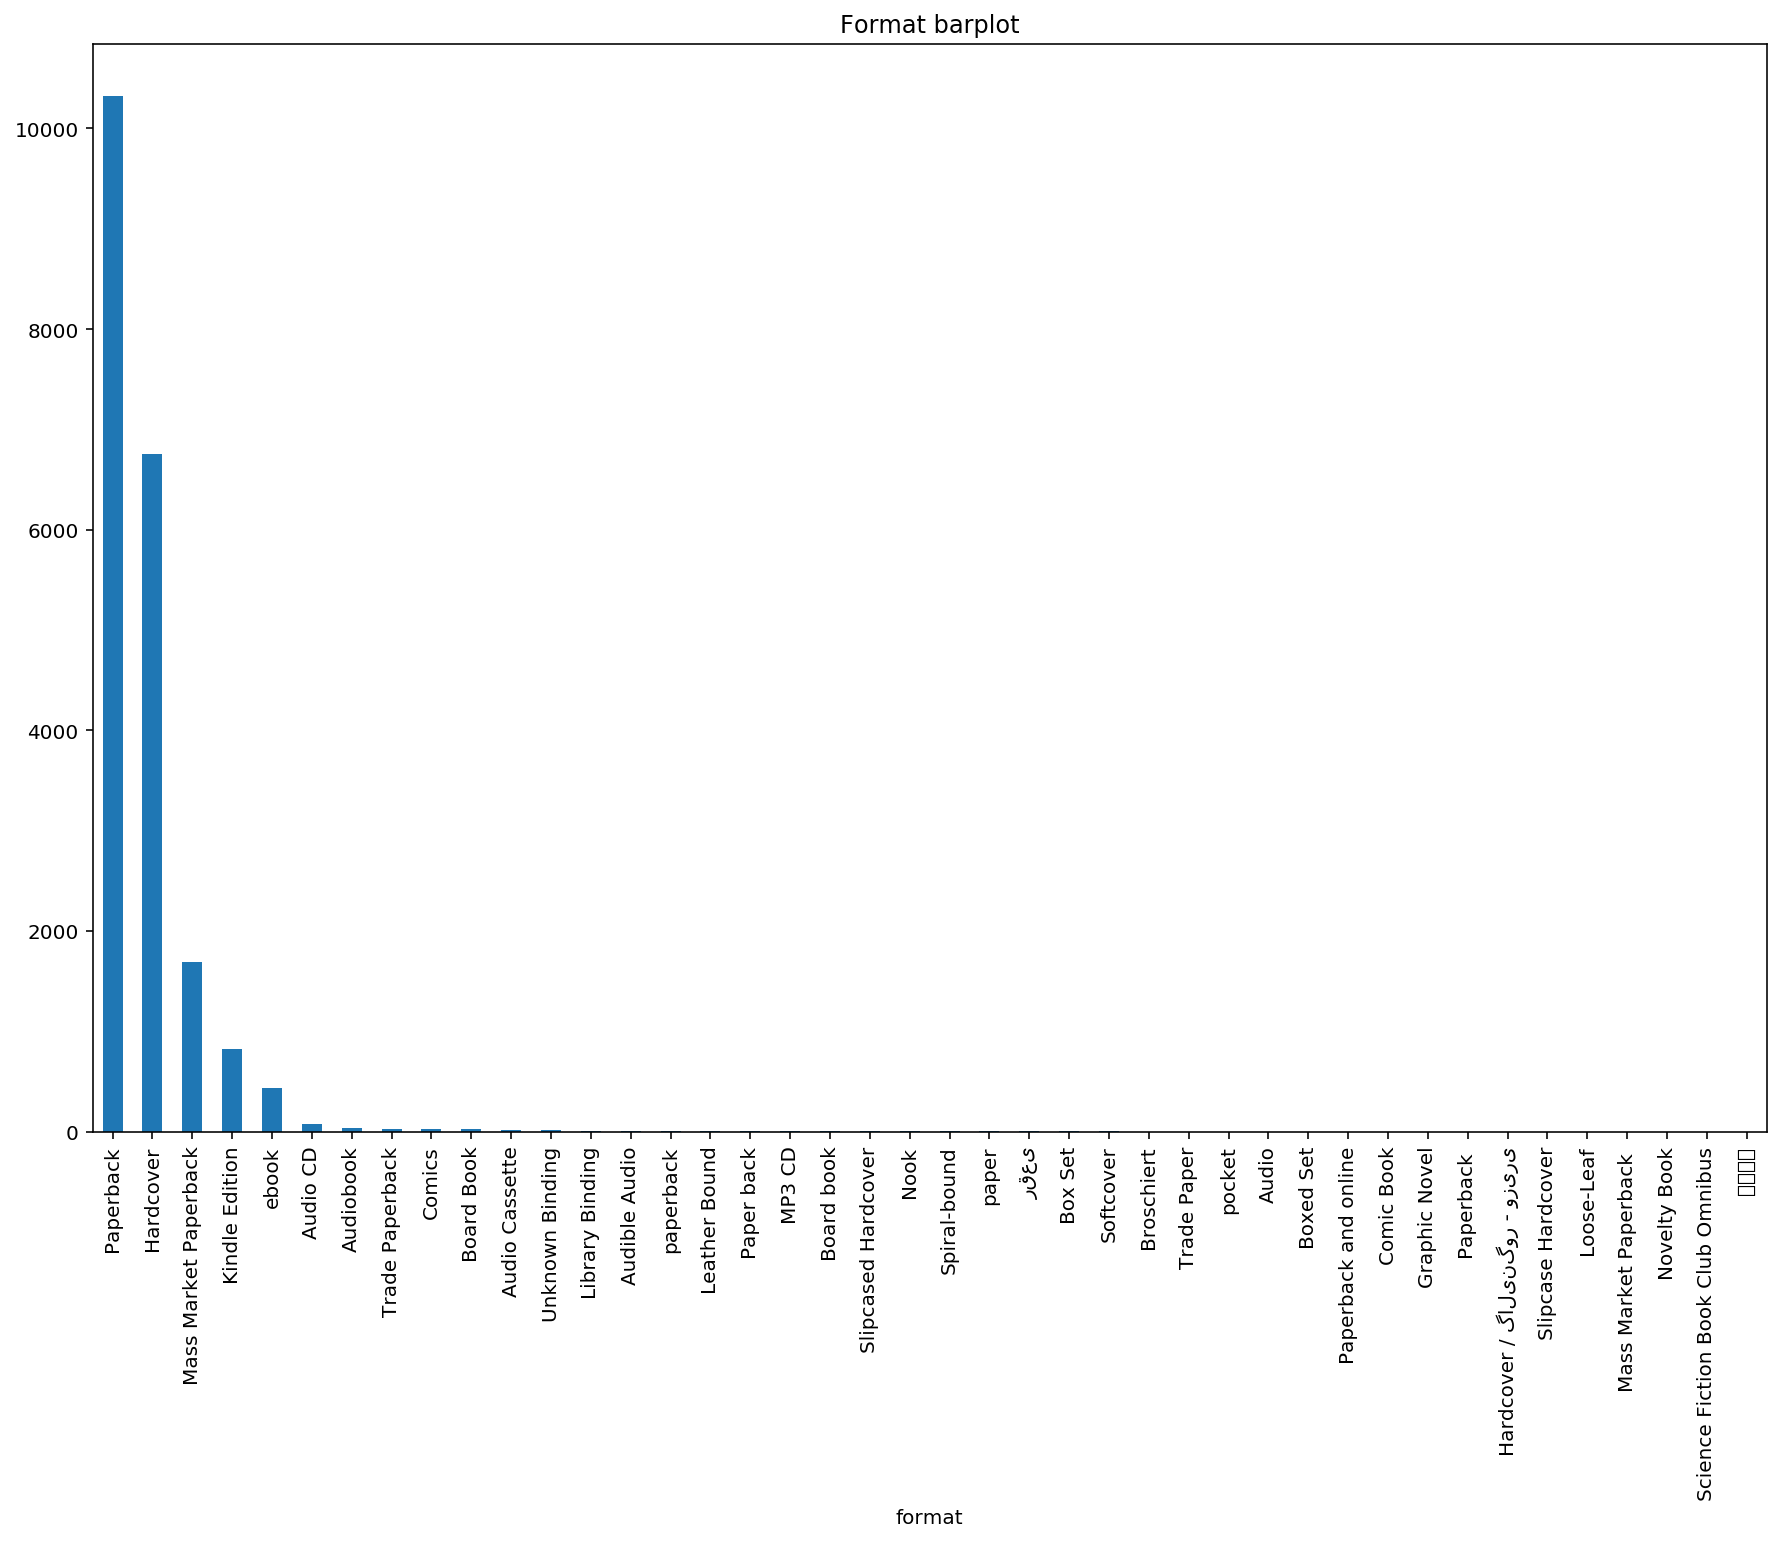

In [14]:
formats.plot.bar(figsize=(15,10))
plt.title("Format barplot")

## Numerical features' distributions

In [18]:
norm_pdf = lambda x, mu, sigma: np.exp(-((x-mu)/sigma)**2/2)/(np.sqrt(2*np.pi)*sigma)

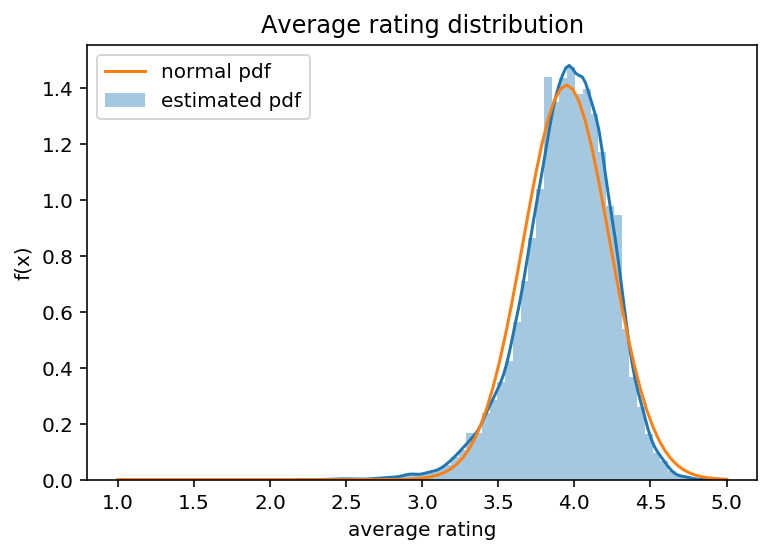

In [14]:
sns.distplot(books_df.average_rating.values, kde=True)
plt.title('Average rating distribution')
plt.xlabel('average rating')
plt.ylabel('f(x)')

x = np.linspace(1, 5, 100)
plt.plot(x, norm_pdf(x, books_df.average_rating.mean(), books_df.average_rating.std()))
plt.legend(['normal pdf', 'estimated pdf'])

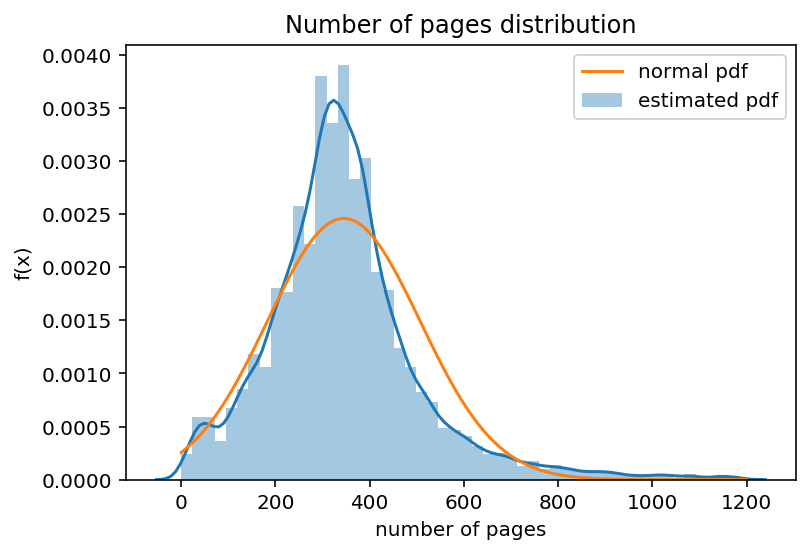

In [50]:
num_of_pages_threshold = 1200
partial_num_of_pages = books_df.num_pages[books_df.num_pages < num_of_pages_threshold]

sns.distplot(partial_num_of_pages.values, kde=True)
plt.title('Number of pages distribution')
plt.xlabel('number of pages')
plt.ylabel('f(x)')

x = np.linspace(books_df.num_pages.min(), num_of_pages_threshold, 100)
plt.plot(x, norm_pdf(x, partial_num_of_pages.mean(), partial_num_of_pages.std()))
plt.legend(['normal pdf', 'estimated pdf'])

In [52]:
#TODO: distributions of year, ratings_count, text_reviews_count; maybe without comparison to normal distribution

## Books popularity

In [15]:
popular_books_ids = reviews_df.groupby(['book_id']).count().user_id.sort_values(ascending=False)
books_by_popularity = books_df.set_index('id').reindex(popular_books_ids.index)
books_by_popularity.loc[:, ['title', 'author']].iloc[:10, :]

,title,author
book_id,,
3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling
4671,The Great Gatsby,F. Scott Fitzgerald
2767052,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins
2657,To Kill a Mockingbird,Harper Lee
41865,"Twilight (Twilight, #1)",Stephenie Meyer
5470,1984,George Orwell
5107,The Catcher in the Rye,J.D. Salinger
968,"The Da Vinci Code (Robert Langdon, #2)",Dan Brown
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling


These are 10 most popular books based on downloaded sample of users readings.

In [97]:
#TODO: distribution of popularity (like below, but described)

# NLP Analysis

In [9]:
text_reviews = reviews_df.loc[reviews_df.user_review != "None"]
print(f'There are {text_reviews.count().book_id} text reviews.')
text_reviews

There are 103011 text reviews.


,book_id,user_id,user_rating,user_review
0,2612,1,4,Really good book. It read like a bestseller (q...
1,368593,1,5,I found this book on a recommendation from a g...
2,211099,1,5,I learned two major things from this book: the...
3,18176747,1,5,I haven’t read many (any?) books that are writ...
4,350,1,5,I really enjoyed this book. The concept of a m...
...,...,...,...,...
1091385,2165,9999944,2,Overrated. Normally I'm 'Hemingway or the High...
1091386,77013,9999944,5,Riveting. A must read.
1091387,7144,9999944,4,Brilliant.
1091388,9361589,9999944,4,The reviews for this book are up and down but ...


In [29]:
text_reviews.loc[text_reviews.review_length == 5]

,book_id,user_id,user_rating,user_review,review_length
2780,17606014,10013145,4,Good!,5
27632,5126859,10091361,5,LOVED,5
67626,50590,1025552,1,Lame.,5
69743,153747,10262322,-1,Great,5
75357,46787,10281967,5,Love.,5
...,...,...,...,...,...
1077652,21787,9992491,5,LOVED,5
1078134,68494,9992751,-1,awful,5
1082006,12099007,9995079,3,Nice!,5
1082149,22557272,9995161,3,Audio,5


Text(0, 0.5, 'f(x)')

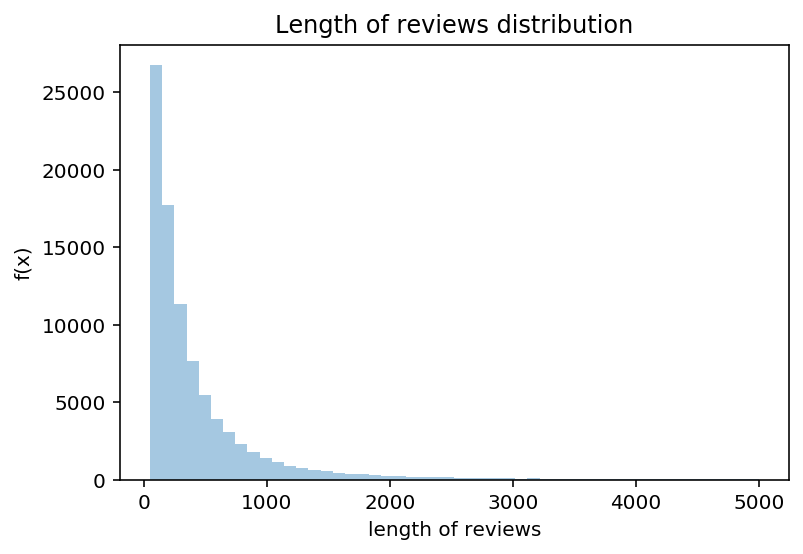

In [36]:
text_reviews['review_length'] = text_reviews.user_review.apply(len)

review_length_range = (50, 5000)
text_reviews_slice = text_reviews.loc[(text_reviews.review_length >= review_length_range[0]) & (text_reviews.review_length <= review_length_range[1])]
sns.distplot(text_reviews_slice.review_length.values, kde=False)
plt.title('Length of reviews distribution')
plt.xlabel('length of reviews')
plt.ylabel('f(x)')


In [41]:
import csv
sample = text_reviews_slice.sample(n=5000, axis=0)
sample['user_review'].to_csv('text_reviews_slice.csv', index=False, header=False, quoting=csv.QUOTE_NONE, escapechar = ' ')

In [39]:
text_reviews_slice.sample(n=5, axis=0)

,book_id,user_id,user_rating,user_review,review_length
246010,6493208,1078224,2,This book contains a lot of medical/scientific...,425
56324,13537891,1019938,3,There's two things that drag down this book. O...,881
1072142,12880428,9988111,3,Very intellectual with references to Jesuit me...,126
228507,3109,1075657,4,This book changed my life- a must read for any...,67
916602,4588,833024,4,"Oskar, the protagonist, is quirky and entirely...",242


In [3]:
reviews_df.sort_values(by='book_id').head(5)

,book_id,user_id,user_rating,user_review
432531,1,34621,5,None
518910,1,40749,5,None
19180,1,112687,4,None
767585,1,6525904,5,None
475564,1,3536464,5,None


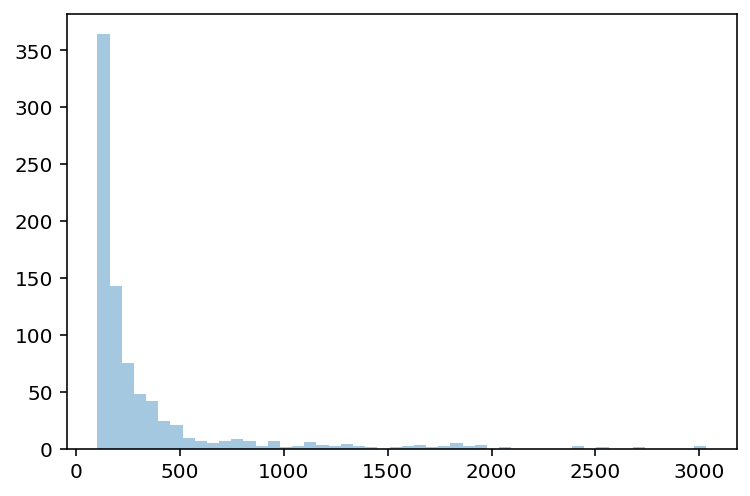

In [10]:
books_popularity = reviews_df.groupby(['book_id']).count()['user_id']
sns.distplot(books_popularity[books_popularity > 100].values, kde=False)

In [18]:
np.sum(books_popularity > 1)

22936

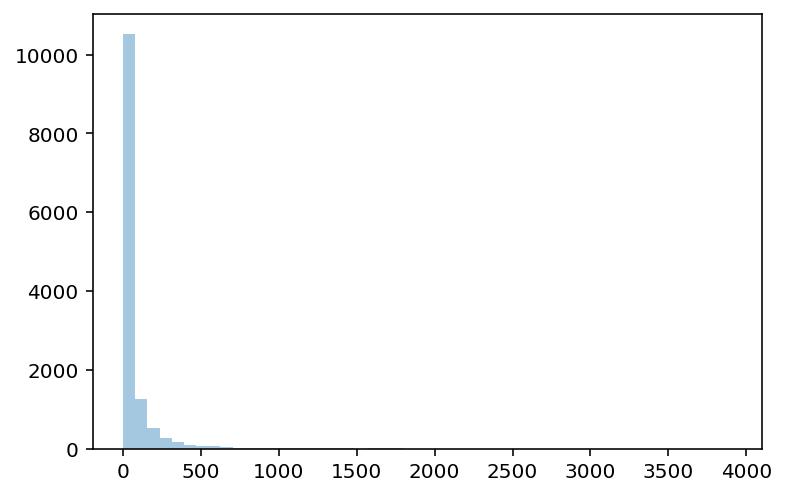

In [12]:
reviews_per_user = reviews_df.groupby(['user_id']).count()['book_id']
sns.distplot(reviews_per_user.values, kde=False)

In [33]:
reviews_df[reviews_df['book_id'] == 10]

,book_id,user_id,user_rating,user_review
39897,10,1627164,4,None
150382,10,4190,5,"yes, i had to post these. you can read them ea..."
153499,10,4674,5,None
155399,10,5,4,Come-on! It's Harry Potter!
170956,10,550,5,No explanation needed......
193903,10,689,5,None
199722,10,7818,5,Who can resist Harry? So sad the magic is comi...


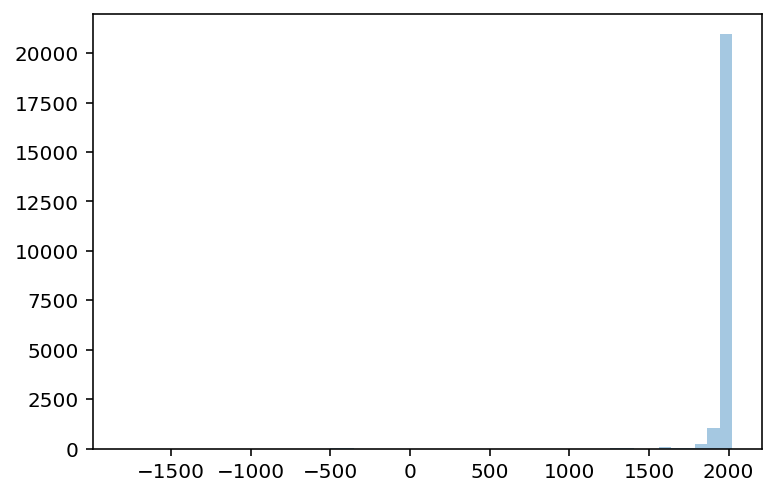

In [88]:
books_years = books_df.year
sns.distplot(books_years.values, kde=False)


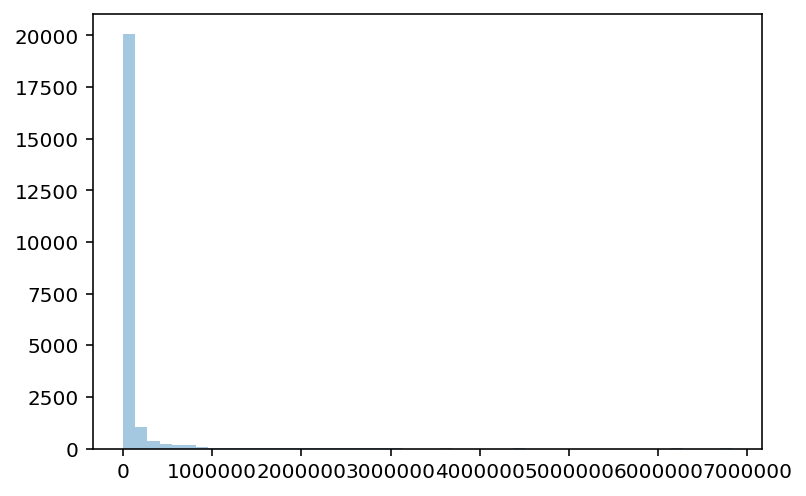

In [95]:
sns.distplot(books_df.ratings_count.values, kde=False)

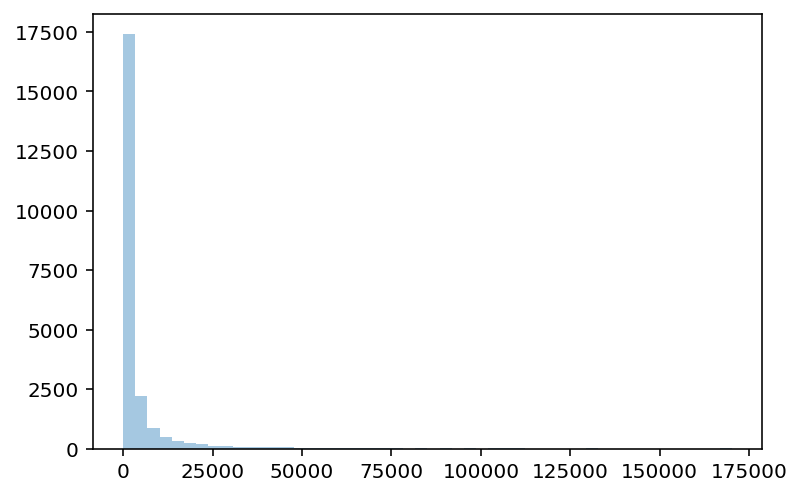

In [97]:
sns.distplot(books_df.text_reviews_count.values, kde=False)